## Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers

## Loading the dataset

In [22]:
df = pd.read_csv('2BIMDB.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [23]:
def clean_text(text):
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

In [24]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [25]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])

In [26]:
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=200)
y = df['sentiment'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=32, input_length=200))

model.add(Flatten())

model.add(Dense(64))
model.add(ReLU())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6914 - loss: 0.5439 - val_accuracy: 0.8704 - val_loss: 0.3101
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9191 - loss: 0.2151 - val_accuracy: 0.8543 - val_loss: 0.3392
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9700 - loss: 0.0917 - val_accuracy: 0.8555 - val_loss: 0.4378
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9924 - loss: 0.0275 - val_accuracy: 0.8431 - val_loss: 0.5732
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9979 - loss: 0.0109 - val_accuracy: 0.8469 - val_loss: 0.6634


In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on the test set: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.6236
Accuracy on the test set: 85.59%


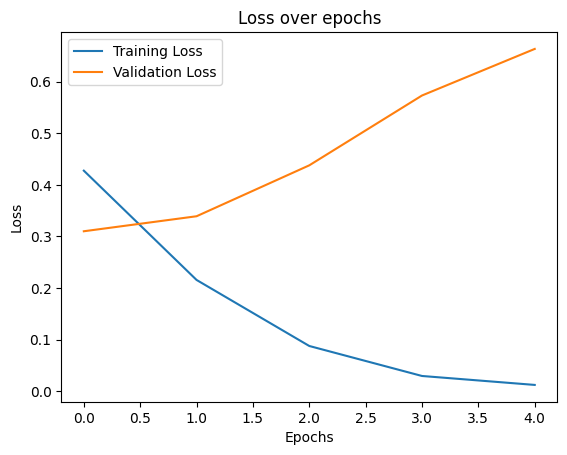

In [30]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 85.59%


##  Justification of ReLU and Sigmoid Activation Functions

* ReLU (Rectified Linear Unit): Works well in hidden layers because it allows the model to learn non-linear relationships without the vanishing gradient problem. It speeds up training and allows the network to learn faster.
* Sigmoid: The output layer requires a function that squashes the output between 0 and 1, making it ideal for binary classification tasks. Sigmoid helps to interpret the final output as a probability (values closer to 0 for negative sentiment and closer to 1 for positive sentiment)

##  Why Binary Cross-Entropy?

Binary cross-entropy is suitable for this task because:

It calculates the difference between actual labels (0 or 1) and predicted probabilities.
It works well when the task is binary classification, optimizing the model to output probabilities near 0 for one class (negative) and near 1 for the other class (positive).

## Results

After training, evaluate the performance using metrics such as accuracy and the confusion matrix for a better understanding of model performance.

* Preprocess the IMDb dataset: convert text to sequences and prepare labels.
* Design the ANN: one or more hidden layers with ReLU and sigmoid activation for binary classification.
* Train the model using binary cross-entropy loss.
* Evaluate the model using accuracy and visualize loss/accuracy over epochs.
* Justify the use of ReLU in hidden layers and sigmoid in the output layer.